In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import graphviz 
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/Acer/Anaconda3/pkgs/graphviz-2.38.0-h6538335_1011/Library/bin/graphviz'

In [2]:
df = pd.read_csv('diabetes.csv', decimal=',')
df.head(5)

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,1,193,77,49,3.9,19,female,61,119,22.5,118,70,32,38,0.84,No diabetes
1,2,146,79,41,3.6,19,female,60,135,26.4,108,58,33,40,0.83,No diabetes
2,3,217,75,54,4.0,20,female,67,187,29.3,110,72,40,45,0.89,No diabetes
3,4,226,97,70,3.2,20,female,64,114,19.6,122,64,31,39,0.79,No diabetes
4,5,164,91,67,2.4,20,female,70,141,20.2,122,86,32,39,0.82,No diabetes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   patient_number   390 non-null    int64  
 1   cholesterol      390 non-null    int64  
 2   glucose          390 non-null    int64  
 3   hdl_chol         390 non-null    int64  
 4   chol_hdl_ratio   390 non-null    float64
 5   age              390 non-null    int64  
 6   gender           390 non-null    object 
 7   height           390 non-null    int64  
 8   weight           390 non-null    int64  
 9   bmi              390 non-null    float64
 10  systolic_bp      390 non-null    int64  
 11  diastolic_bp     390 non-null    int64  
 12  waist            390 non-null    int64  
 13  hip              390 non-null    int64  
 14  waist_hip_ratio  390 non-null    float64
 15  diabetes         390 non-null    object 
dtypes: float64(3), int64(11), object(2)
memory usage: 48.9+ KB


In [4]:
df = df.replace({'diabetes':{'No diabetes': 0, 'Diabetes': 1}, 
                'gender': {'female': 0, 'male': 1}})
df = df.drop(['patient_number'], 1)

In [5]:
df

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,193,77,49,3.9,19,0,61,119,22.5,118,70,32,38,0.84,0
1,146,79,41,3.6,19,0,60,135,26.4,108,58,33,40,0.83,0
2,217,75,54,4.0,20,0,67,187,29.3,110,72,40,45,0.89,0
3,226,97,70,3.2,20,0,64,114,19.6,122,64,31,39,0.79,0
4,164,91,67,2.4,20,0,70,141,20.2,122,86,32,39,0.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,227,105,44,5.2,83,0,59,125,25.2,150,90,35,40,0.88,0
386,226,279,52,4.3,84,0,60,192,37.5,144,88,41,48,0.85,1
387,301,90,118,2.6,89,0,61,115,21.7,218,90,31,41,0.76,0
388,232,184,114,2.0,91,0,61,127,24.0,170,82,35,38,0.92,1


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cholesterol      390 non-null    int64  
 1   glucose          390 non-null    int64  
 2   hdl_chol         390 non-null    int64  
 3   chol_hdl_ratio   390 non-null    float64
 4   age              390 non-null    int64  
 5   gender           390 non-null    int64  
 6   height           390 non-null    int64  
 7   weight           390 non-null    int64  
 8   bmi              390 non-null    float64
 9   systolic_bp      390 non-null    int64  
 10  diastolic_bp     390 non-null    int64  
 11  waist            390 non-null    int64  
 12  hip              390 non-null    int64  
 13  waist_hip_ratio  390 non-null    float64
 14  diabetes         390 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 45.8 KB


In [7]:
def missing_values_table(df):
        miss = df.isnull().sum()
        percent = miss/len(df)*100
        miss_df = pd.concat([miss, percent], axis=1)
        miss_df = miss_df.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        return miss_df

In [8]:
missing_values_table(df)

,Missing Values,% of Total Values
cholesterol,0,0.0
glucose,0,0.0
hdl_chol,0,0.0
chol_hdl_ratio,0,0.0
age,0,0.0
gender,0,0.0
height,0,0.0
weight,0,0.0
bmi,0,0.0
systolic_bp,0,0.0


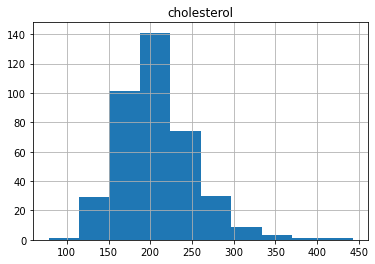

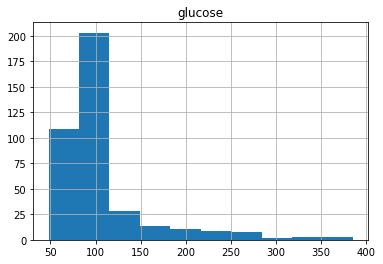

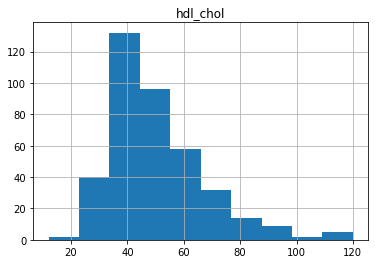

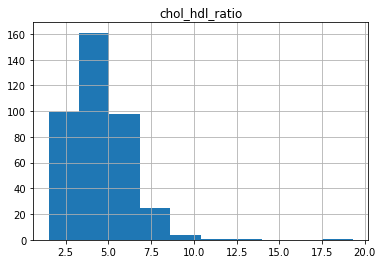

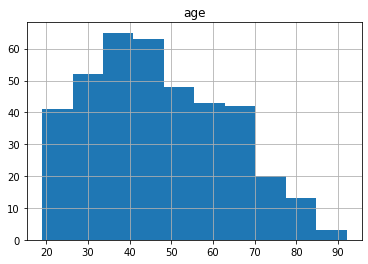

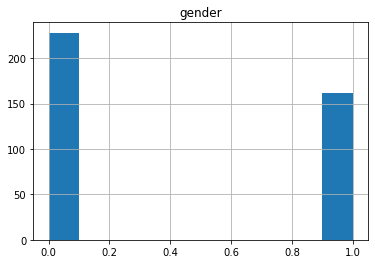

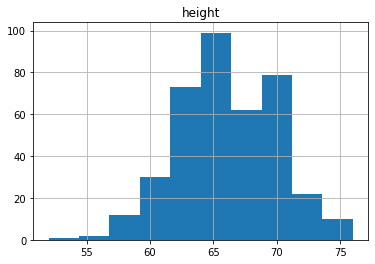

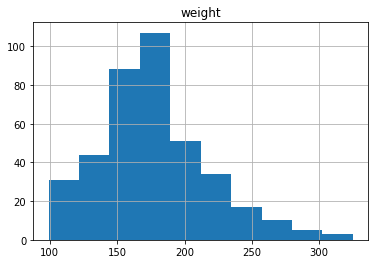

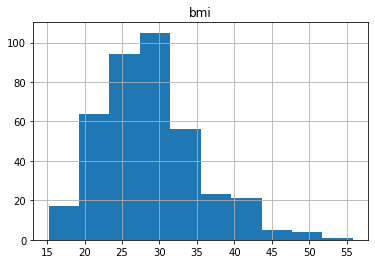

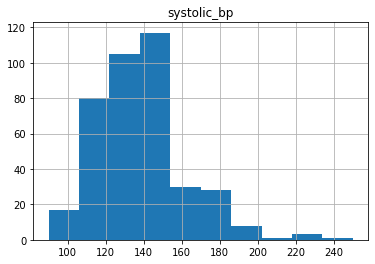

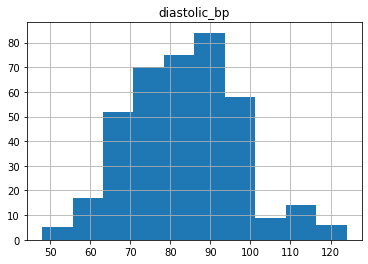

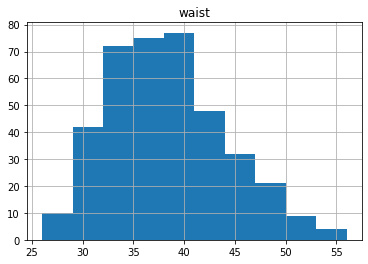

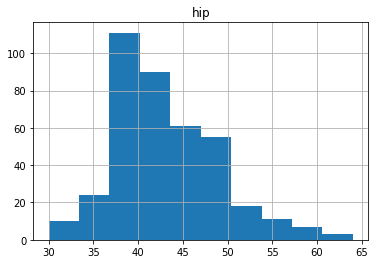

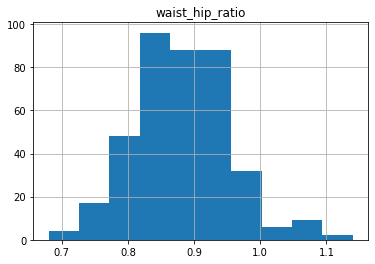

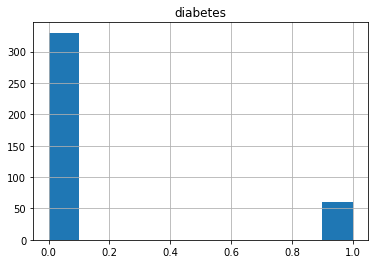

In [9]:
for  feature in (df.columns):
    df.hist(feature)   

In [10]:
def drop_outliners(df, df_q, features):
    outliners = []
    for feature in features:
        out_l = df[(df[feature]>df_q.iloc[1][feature]) | (df[feature]<df_q.iloc[0][feature])]
        outliners_count = len(out_l.index)
        if outliners_count < 2 and outliners_count > 0 :
            outliners.append(feature)
            print (out_l)
            df = df.drop(out_l.index)
    print('Outliners in: ', outliners)
    return df

In [11]:
df_q =  df.quantile([0.0001, 0.9999])
features = df.drop(['gender', 'diabetes'], 1).columns
print(features)
df = drop_outliners(df, df_q, features)

Index(['cholesterol', 'glucose', 'hdl_chol', 'chol_hdl_ratio', 'age', 'height',
       'weight', 'bmi', 'systolic_bp', 'diastolic_bp', 'waist', 'hip',
       'waist_hip_ratio'],
      dtype='object')
     cholesterol  glucose  hdl_chol  chol_hdl_ratio  age  gender  height  \
389          165       94        69             2.4   92       0      62   

     weight   bmi  systolic_bp  diastolic_bp  waist  hip  waist_hip_ratio  \
389     217  39.7          160            82     51   51              1.0   

     diabetes  
389         0  
     cholesterol  glucose  hdl_chol  chol_hdl_ratio  age  gender  height  \
144          152      103        32             4.8   40       0      52   

     weight   bmi  systolic_bp  diastolic_bp  waist  hip  waist_hip_ratio  \
144     187  48.6          148            82     38   49             0.78   

     diabetes  
144         0  
     cholesterol  glucose  hdl_chol  chol_hdl_ratio  age  gender  height  \
233          181      255        26         

In [12]:
df.describe()

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
count,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000
mean,207.550388,107.002584,50.328165,4.522997,46.666667,0.416021,65.984496,176.912145,28.655297,137.038760,83.289406,37.788114,42.940568,0.880672,0.152455
std,44.678291,53.475504,17.250616,1.735387,16.333474,0.493535,3.855521,39.853001,6.474577,22.911319,13.549524,5.669349,5.654938,0.071867,0.359926
min,78.000000,48.000000,12.000000,1.500000,19.000000,0.000000,55.000000,99.000000,15.200000,90.000000,48.000000,26.000000,30.000000,0.680000,0.000000
25%,179.000000,81.000000,38.000000,3.200000,34.000000,0.000000,63.000000,150.000000,24.100000,121.500000,75.000000,33.000000,39.000000,0.830000,0.000000
50%,204.000000,89.000000,46.000000,4.200000,44.000000,0.000000,66.000000,172.000000,27.800000,136.000000,82.000000,37.000000,42.000000,0.880000,0.000000
75%,229.500000,107.500000,59.000000,5.400000,60.000000,1.000000,69.000000,199.500000,32.150000,147.500000,90.000000,41.000000,46.000000,0.930000,0.000000
max,443.000000,385.000000,120.000000,19.300000,91.000000,1.000000,76.000000,325.000000,55.800000,250.000000,124.000000,55.000000,64.000000,1.140000,1.000000


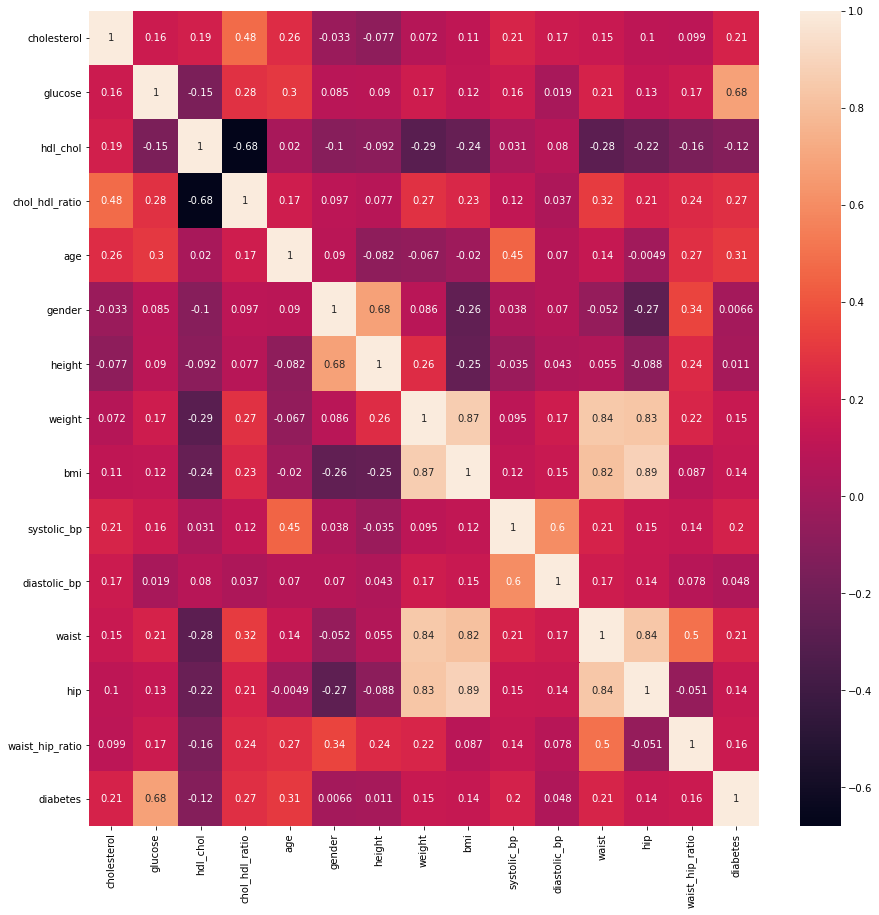

In [13]:
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True)

In [14]:
mms= MinMaxScaler()
features = df.drop(['gender', 'diabetes'], 1).columns
df[features] = mms.fit_transform(df[features])

In [15]:
df

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,0.315068,0.086053,0.342593,0.134831,0.000000,0,0.285714,0.088496,0.179803,0.17500,0.289474,0.206897,0.235294,0.347826,0
1,0.186301,0.091988,0.268519,0.117978,0.000000,0,0.238095,0.159292,0.275862,0.11250,0.131579,0.241379,0.294118,0.326087,0
2,0.380822,0.080119,0.388889,0.140449,0.013889,0,0.571429,0.389381,0.347291,0.12500,0.315789,0.482759,0.441176,0.456522,0
3,0.405479,0.145401,0.537037,0.095506,0.013889,0,0.428571,0.066372,0.108374,0.20000,0.210526,0.172414,0.264706,0.239130,0
4,0.235616,0.127596,0.509259,0.050562,0.013889,0,0.714286,0.185841,0.123153,0.20000,0.500000,0.206897,0.264706,0.304348,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,0.484932,0.189911,0.203704,0.337079,0.875000,1,0.523810,0.283186,0.273399,0.55625,0.539474,0.379310,0.382353,0.391304,0
385,0.408219,0.169139,0.296296,0.207865,0.888889,0,0.190476,0.115044,0.246305,0.37500,0.552632,0.310345,0.294118,0.434783,0
386,0.405479,0.685460,0.370370,0.157303,0.902778,0,0.238095,0.411504,0.549261,0.33750,0.526316,0.517241,0.529412,0.369565,1
387,0.610959,0.124629,0.981481,0.061798,0.972222,0,0.285714,0.070796,0.160099,0.80000,0.552632,0.172414,0.323529,0.173913,0


In [16]:
df_shuffled = shuffle(df, random_state=123)
train = df_shuffled[:int(len(df_shuffled)*0.8)]
test = df_shuffled[len(train):]

In [17]:
train

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
287,0.320548,0.178042,0.314815,0.151685,0.555556,0,0.571429,0.323009,0.288177,0.37500,0.710526,0.413793,0.382353,0.434783,1
293,0.430137,0.160237,0.277778,0.230337,0.569444,1,0.666667,0.384956,0.302956,0.36250,0.657895,0.482759,0.352941,0.586957,0
263,0.345205,0.136499,0.388889,0.129213,0.500000,0,0.523810,0.455752,0.428571,0.31250,0.552632,0.586207,0.500000,0.500000,0
250,0.323288,0.213650,0.509259,0.078652,0.458333,0,0.333333,0.212389,0.288177,0.33750,0.605263,0.275862,0.352941,0.282609,1
379,0.586301,0.554896,0.398148,0.213483,0.833333,1,0.714286,0.292035,0.209360,0.50000,0.552632,0.448276,0.323529,0.586957,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0.191781,0.430267,0.018519,0.511236,0.486111,0,0.571429,0.292035,0.261084,0.31250,0.223684,0.551724,0.352941,0.695652,0
312,0.279452,0.130564,0.203704,0.213483,0.611111,1,0.666667,0.309735,0.241379,0.34375,0.315789,0.310345,0.264706,0.478261,0
103,0.441096,0.145401,0.398148,0.157303,0.222222,1,0.904762,0.314159,0.162562,0.20000,0.184211,0.206897,0.235294,0.347826,0
150,0.254795,0.130564,0.388889,0.095506,0.291667,1,0.761905,0.508850,0.359606,0.30000,0.605263,0.517241,0.264706,0.804348,0


In [18]:
test

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
67,0.282192,0.086053,0.314815,0.134831,0.152778,0,0.523810,0.699115,0.647783,0.45000,0.789474,0.724138,0.735294,0.369565,0
3,0.405479,0.145401,0.537037,0.095506,0.013889,0,0.428571,0.066372,0.108374,0.20000,0.210526,0.172414,0.264706,0.239130,0
56,0.304110,0.142433,0.324074,0.140449,0.125000,0,0.428571,0.446903,0.470443,0.28750,0.052632,0.413793,0.441176,0.347826,0
306,0.512329,0.836795,0.203704,0.353933,0.583333,1,0.904762,0.407080,0.229064,0.50000,0.526316,0.448276,0.323529,0.586957,1
235,0.312329,0.109792,0.527778,0.073034,0.444444,1,0.476190,0.207965,0.224138,0.25000,0.815789,0.241379,0.176471,0.521739,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,0.263014,0.370920,0.203704,0.202247,0.430556,1,0.714286,0.725664,0.554187,0.43125,0.671053,0.862069,1.000000,0.260870,0
98,0.254795,0.109792,0.453704,0.073034,0.208333,0,0.380952,0.287611,0.339901,0.18750,0.421053,0.275862,0.382353,0.239130,0
324,0.484932,0.154303,0.203704,0.337079,0.625000,1,0.619048,0.566372,0.475369,0.27500,0.342105,0.620690,0.500000,0.565217,0
384,0.484932,0.189911,0.203704,0.337079,0.875000,1,0.523810,0.283186,0.273399,0.55625,0.539474,0.379310,0.382353,0.391304,0


In [19]:
x_train = train.loc[:, train.columns != 'diabetes'].to_numpy()
k_train = train['diabetes'].to_numpy()
x_test = test.loc[:, test.columns != 'diabetes'].to_numpy()
k_test = test['diabetes'].to_numpy()

In [20]:
x_train, k_train

(array([[0.32054795, 0.17804154, 0.31481481, ..., 0.4137931 , 0.38235294,
         0.43478261],
        [0.43013699, 0.16023739, 0.27777778, ..., 0.48275862, 0.35294118,
         0.58695652],
        [0.34520548, 0.13649852, 0.38888889, ..., 0.5862069 , 0.5       ,
         0.5       ],
        ...,
        [0.44109589, 0.14540059, 0.39814815, ..., 0.20689655, 0.23529412,
         0.34782609],
        [0.25479452, 0.1305638 , 0.38888889, ..., 0.51724138, 0.26470588,
         0.80434783],
        [0.34246575, 0.74480712, 0.28703704, ..., 0.75862069, 0.73529412,
         0.41304348]]),
 array([1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0

### Decision Tree Classifier, Random Forest Classifier

In [47]:
def decision_tree(x_train, k_train, x_test, k_test):
    dt = DecisionTreeClassifier(max_depth = 6, splitter = 'random')
    dt = dt.fit(x_train, k_train)
    k_pred = dt.predict(x_test)

    print('Train score: ', dt.score(x_train, k_train))
    print('Test score: ', dt.score(x_test, k_test))
    return dt

In [53]:
def random_forest(x_train, k_train, x_test, k_test):
    rf = RandomForestClassifier(n_estimators = 10)
    rf = rf.fit(x_train, k_train)

    k_pred = rf.predict(x_test)

    print('Train score: ', rf.score(x_train, k_train))
    print('Test score: ', rf.score(x_test, k_test))
    return rf

In [54]:
rf = random_forest(x_train, k_train, x_test, k_test)

Train score:  0.9902912621359223
Test score:  0.9230769230769231


In [50]:
def visualization (classif):
    dot_data = tree.export_graphviz(classif, out_file=None) 
    graph = graphviz.Source(dot_data) 

    dot_data = tree.export_graphviz(classif, out_file=None, 
                          feature_names=train.loc[:, train.columns != 'diabetes'].columns,  
                          class_names=['0', '1'],  
                          filled=True, rounded=True,  
                            special_characters=True)  
    graph = graphviz.Source(dot_data)  
    return graph 

In [51]:
dt = decision_tree(x_train, k_train, x_test, k_test)

Train score:  0.9546925566343042
Test score:  0.9102564102564102


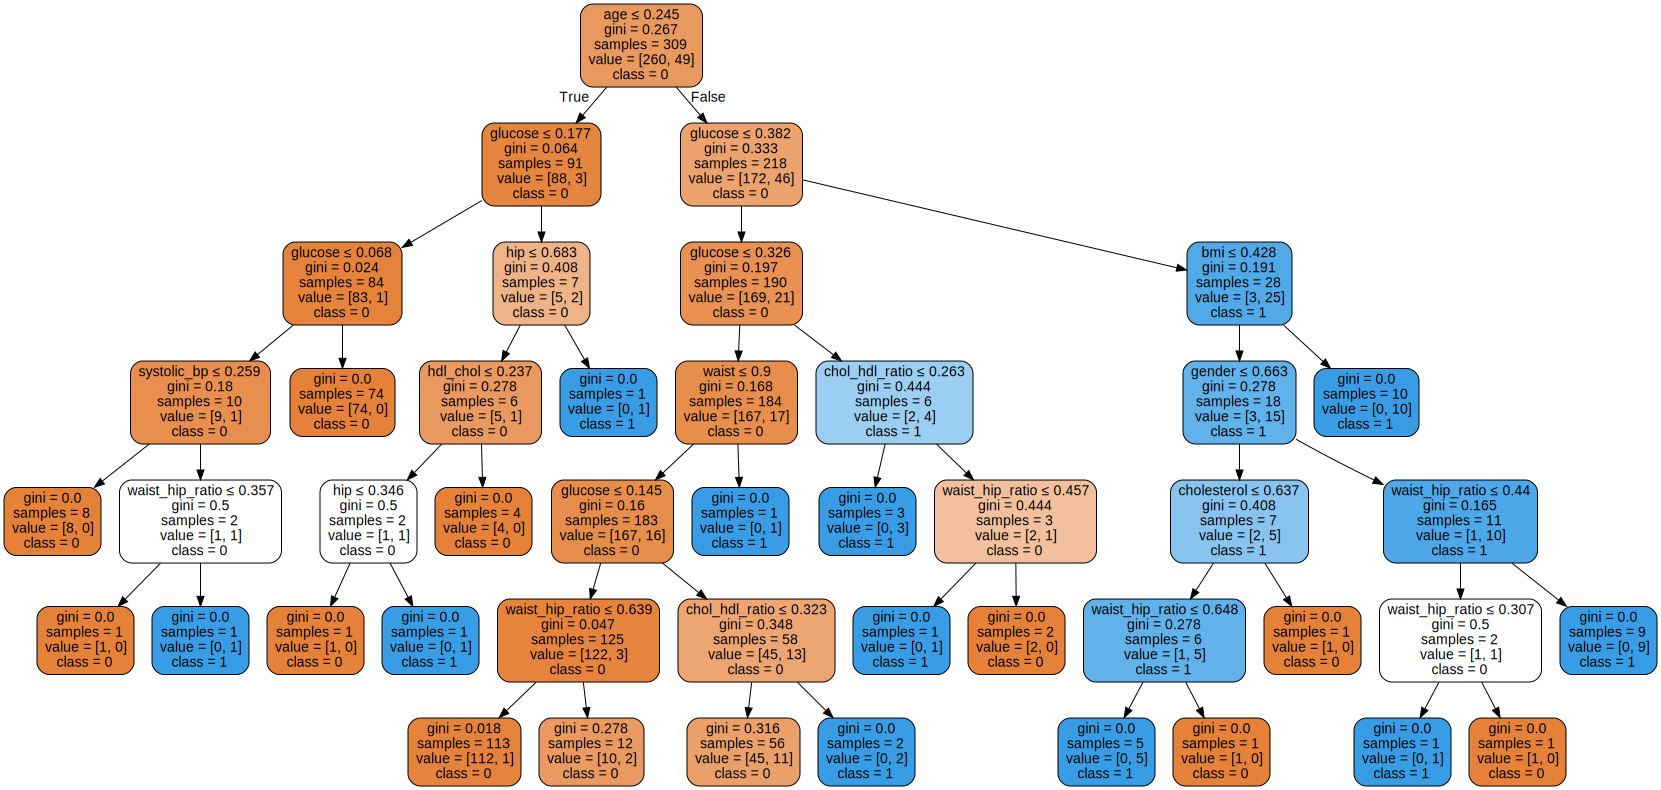

In [52]:
visualization (dt)

In [27]:
rf = random_forest(x_train, k_train, x_test, k_test)

Train score:  0.9967637540453075
Test score:  0.9358974358974359
